##Import Data


In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

In [4]:
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets
display(X.head())
display(y.head())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II


In [5]:
y_orig = y

##Data Exploration

In [ ]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [ ]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

##Data Preprocessing

In [6]:
# encoding for X binary columns
label_encode_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
one_hot_encode_cols = ['CAEC', 'CALC', 'MTRANS']

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_cleaned = pd.get_dummies(X, columns=one_hot_encode_cols)

X_cleaned = pd.DataFrame(X_cleaned)
#cast
X_cleaned[['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking']] = X_cleaned[['CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking']].astype(int)
X_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# encoding for y
mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
y['NObeyesdad'] = y['NObeyesdad'].map(mapping)
y

,NObeyesdad
0,1
1,1
2,1
3,2
4,3
...,...
2106,6
2107,6
2108,6
2109,6


In [8]:
X_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,0,1,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,0,1,0,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,0,1,0,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
# Normalize X (for logistic regression below)
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X_cleaned), columns = X_cleaned.columns)
X_norm

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,1.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.0,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.148443,0.491943,0.689616,1.0,1.0,1.0,0.666667,0.0,0.364070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.169850,0.563366,0.707037,1.0,1.0,1.0,0.666667,0.0,0.502565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.181362,0.570200,0.706637,1.0,1.0,1.0,0.666667,0.0,0.527097,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.220467,0.546132,0.704079,1.0,1.0,1.0,0.666667,0.0,0.926170,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Normalize y
# scaler = MinMaxScaler()
# y_norm = pd.DataFrame(scaler.fit_transform(y), columns = y.columns)
# y_norm.head()

,NObeyesdad
0,0.166667
1,0.166667
2,0.166667
3,0.333333
4,0.500000


In [ ]:
y.describe()

,NObeyesdad
count,2111.000000
mean,3.112269
std,1.985062
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
X_norm.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.219417,0.474863,0.355120,0.817622,0.883941,0.709522,0.561876,0.020843,0.504006,...,0.024159,0.000474,0.033160,0.663667,0.302700,0.216485,0.003316,0.005211,0.748460,0.026528
std,0.500083,0.135021,0.176047,0.195457,0.386247,0.320371,0.266963,0.259346,0.142893,0.306477,...,0.153580,0.021765,0.179096,0.472566,0.459535,0.411946,0.057502,0.072015,0.434001,0.160737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.126536,0.339623,0.197562,1.000000,1.000000,0.500000,0.552913,0.000000,0.292406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.186764,0.472640,0.328358,1.000000,1.000000,0.692751,0.666667,0.000000,0.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.255319,0.600875,0.510677,1.000000,1.000000,1.000000,0.666667,0.000000,0.738710,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Standardize X (binary columns excluded)  for future deep learning
scaler = StandardScaler()
standardize_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X_standardized = X_cleaned.copy()
X_standardized[standardize_columns] = scaler.fit_transform(X_cleaned[standardize_columns])
X_standardized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,0,0,1,0,0,0,1,0
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,0,0,0,1,0,0,0,0,1,0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,0,0,1,0,0,0,0,0,1,0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,0,0,1,0,0,0,0,0,0,1
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,0,0,0,1,0,0,0,0,1,0


##Plot the data


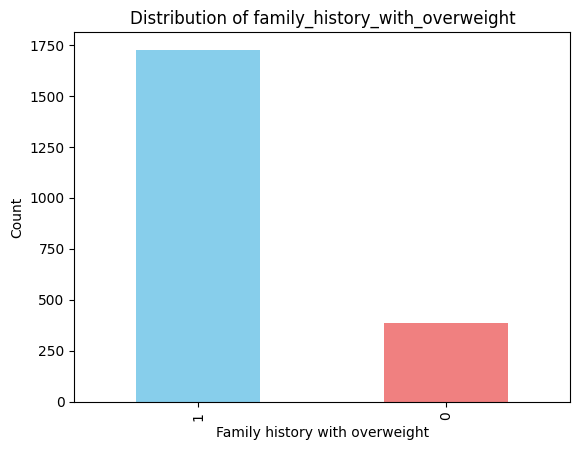

In [11]:
categorical_feature = 'family_history_overweight'
X["family_history_with_overweight"].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title(f'Distribution of family_history_with_overweight')
plt.xlabel('Family history with overweight')
plt.ylabel('Count')
plt.show()

In [12]:
def draw_pie(col):
  value_counts = X[col].value_counts()

  plt.figure(figsize=(8, 8))
  plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Pie Chart for {col}')
  plt.axis('equal')
  plt.show()

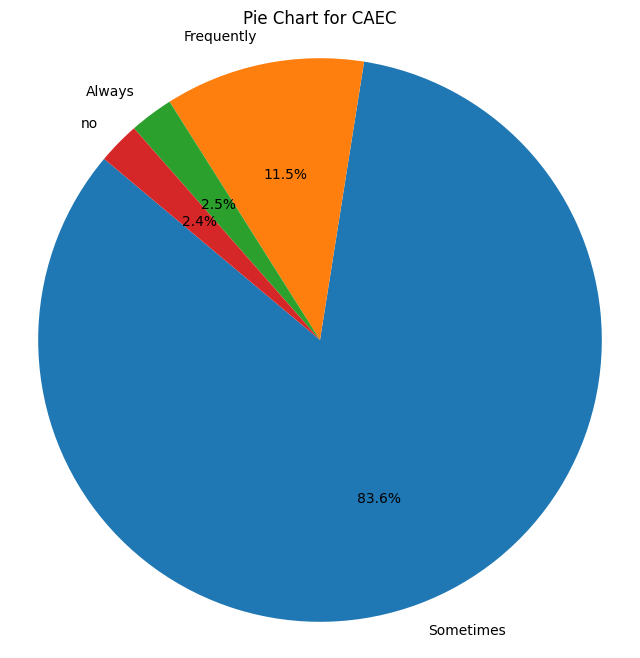

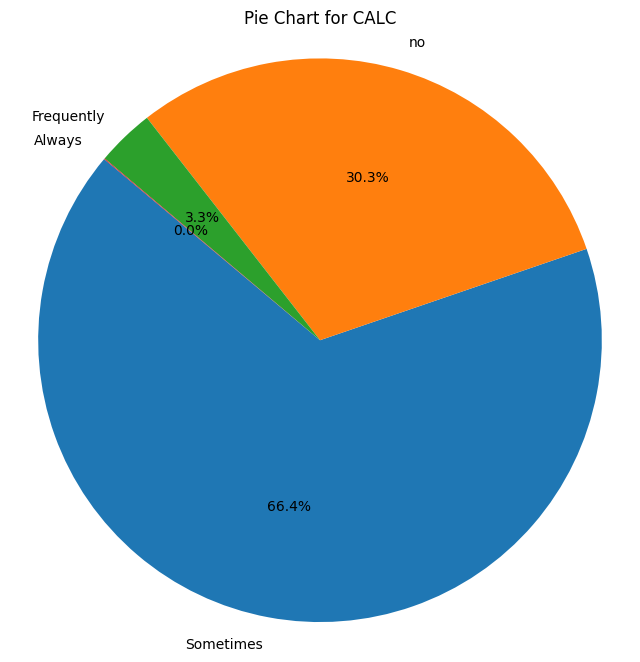

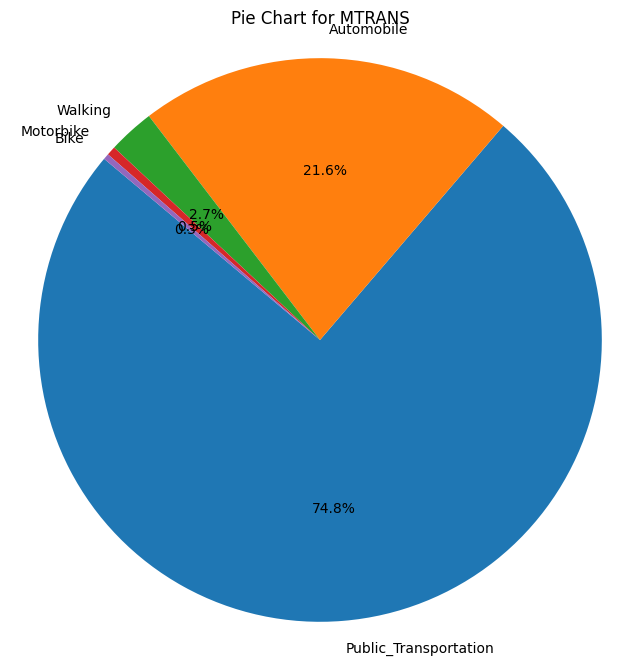

In [13]:
for col in ['CAEC', 'CALC', 'MTRANS']:
  draw_pie(col)

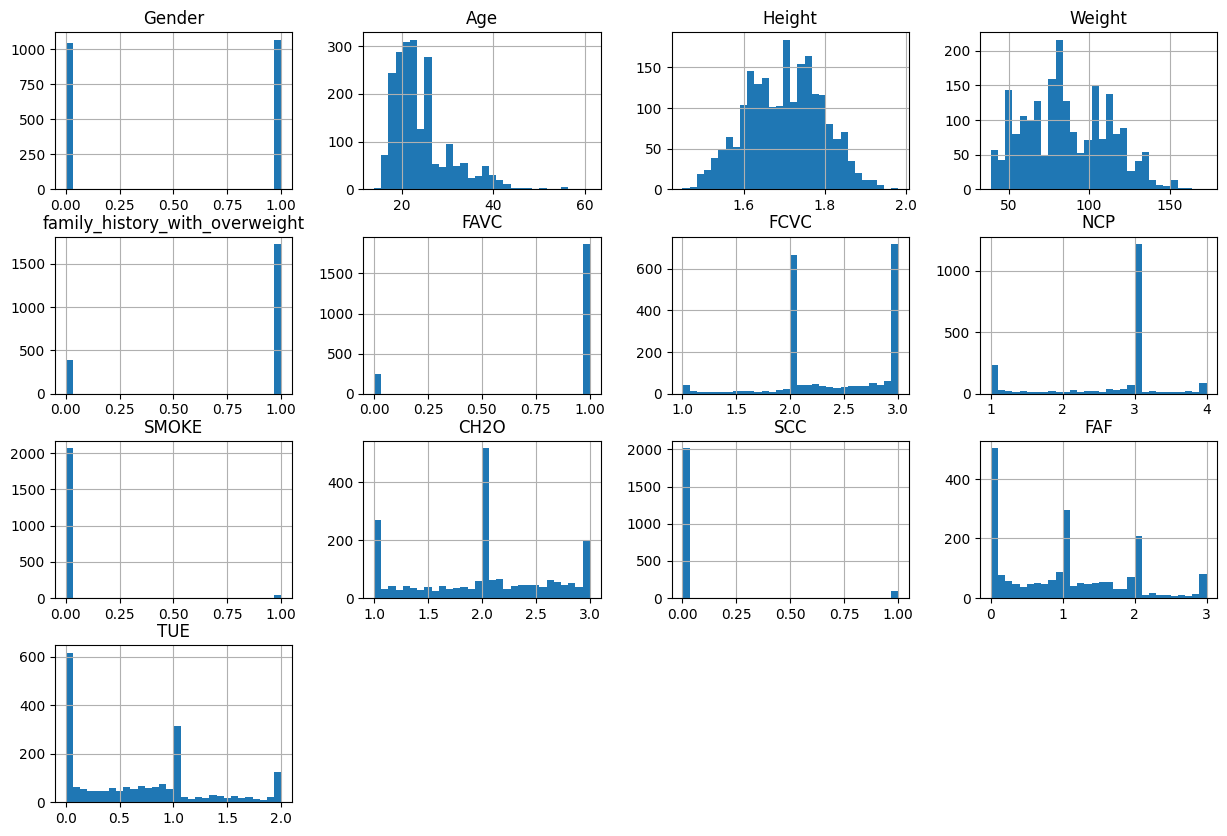

In [14]:
X.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
X_cleaned.cov()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Gender,0.250083,0.153580,2.885776e-02,2.117485,0.019801,0.010403,-0.073295,0.026302,0.003194,0.033083,...,0.004833,2.341605e-04,0.003121,-0.008908,0.005553,0.028338,0.001639,0.001628,-0.034766,0.003160
Age,0.153580,40.271313,-1.537006e-02,33.667180,0.504256,0.129916,0.055198,-0.216968,0.083414,-0.176222,...,-0.060226,-1.569953e-03,0.093839,-0.037437,-0.054833,1.580760,0.001333,0.009271,-1.527035,-0.064328
Height,0.028858,-0.015370,8.705789e-03,1.131795,0.008926,0.005332,-0.001899,0.017689,0.000740,0.012203,...,-0.001370,-7.949542e-07,0.000761,0.004721,-0.005481,0.002992,0.000156,-0.000070,-0.003632,0.000554
Weight,2.117485,33.667180,1.131795e+00,685.977477,5.025968,2.284846,3.022323,2.189976,0.096357,3.220031,...,-0.427423,-1.023036e-02,-0.195968,3.213072,-3.006874,-0.146942,-0.032750,-0.070354,0.674423,-0.424378
family_history_with_overweight,0.019801,0.504256,8.926213e-03,5.025968,0.149187,0.025743,0.008326,0.021448,0.000960,0.034906,...,-0.011232,8.643508e-05,-0.001532,-0.004497,0.005943,0.015804,-0.000343,-0.001419,-0.009878,-0.004164
FAVC,0.010403,0.129916,5.331682e-03,2.284846,0.025743,0.102638,-0.004667,-0.001745,-0.002319,0.001909,...,-0.001460,5.500414e-05,-0.003259,0.021137,-0.017933,0.007601,-0.001511,-0.000817,0.003968,-0.009242
FCVC,-0.073295,0.055198,-1.899112e-03,3.022323,0.008326,-0.004667,0.285078,0.017537,0.001093,0.022406,...,-0.008520,-1.985986e-04,-0.001784,0.020893,-0.018910,-0.013428,-0.000916,-0.000289,0.013432,0.001201
NCP,0.026302,-0.216968,1.768929e-02,2.189976,0.021448,-0.001745,0.017537,0.605344,0.000868,0.027225,...,-0.017485,-7.988759e-04,-0.002665,0.036503,-0.033039,0.017123,0.001043,0.000217,-0.019196,0.000813
SMOKE,0.003194,0.083414,7.399519e-04,0.096357,0.000960,-0.002319,0.001093,0.000868,0.020418,-0.002802,...,-0.000030,-9.878295e-06,0.002626,0.000852,-0.003469,0.000699,-0.000069,0.000365,-0.001390,0.000395
CH2O,0.033083,-0.176222,1.220329e-02,3.220031,0.034906,0.001909,0.022406,0.027225,-0.002802,0.375712,...,0.014969,-3.796874e-06,0.005428,0.018032,-0.023456,-0.011675,0.000921,-0.000042,0.009977,0.000818


In [ ]:
def draw_Scatter(df,x,y,size=(10,6)):
    # Scatter plot
    plt.figure(figsize=size)
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'Scatter Plot between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

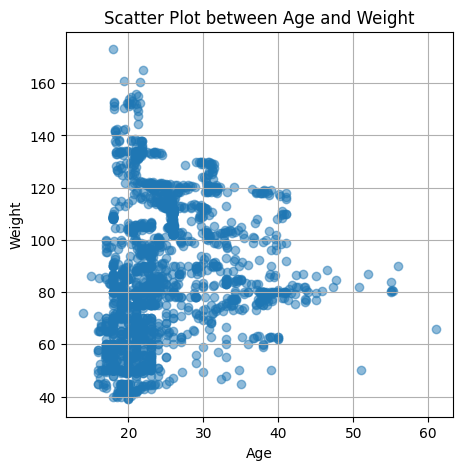

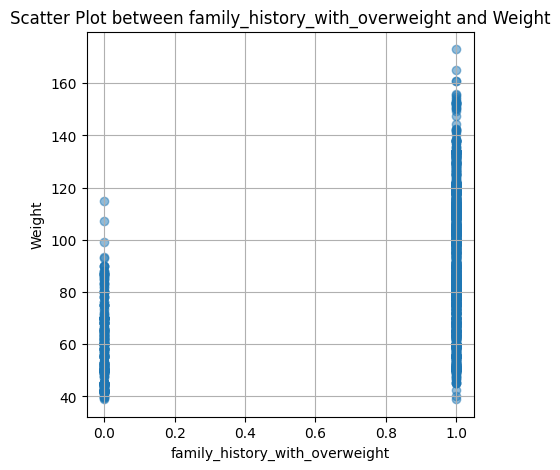

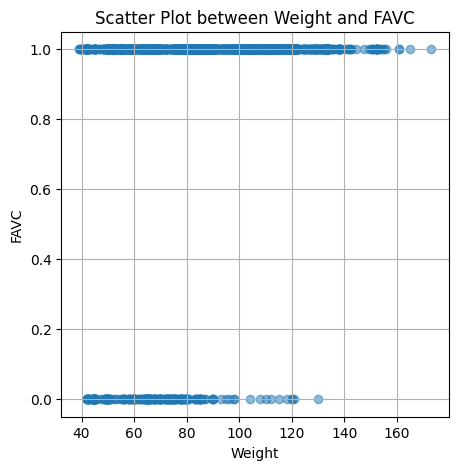

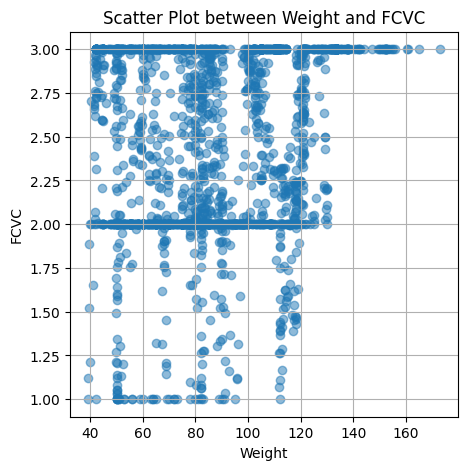

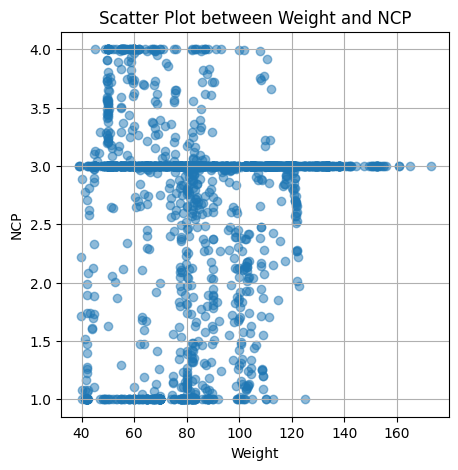

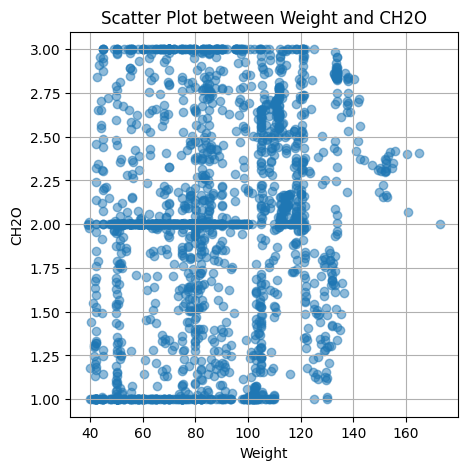

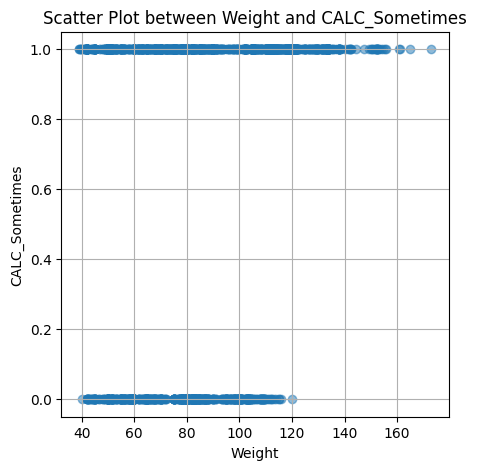

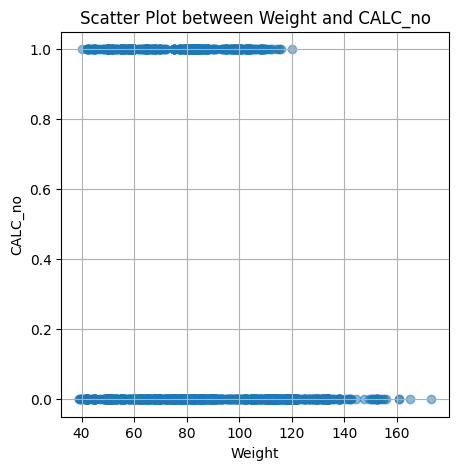

In [ ]:
draw_Scatter(X_cleaned,"Age","Weight",size=(5,5))
draw_Scatter(X_cleaned,"family_history_with_overweight","Weight",size=(5,5))
for col in ['FAVC',	'FCVC',	'NCP', 'CH2O', 'CALC_Sometimes' , 'CALC_no']:
  draw_Scatter(X_cleaned,"Weight", col, size=(5,5))


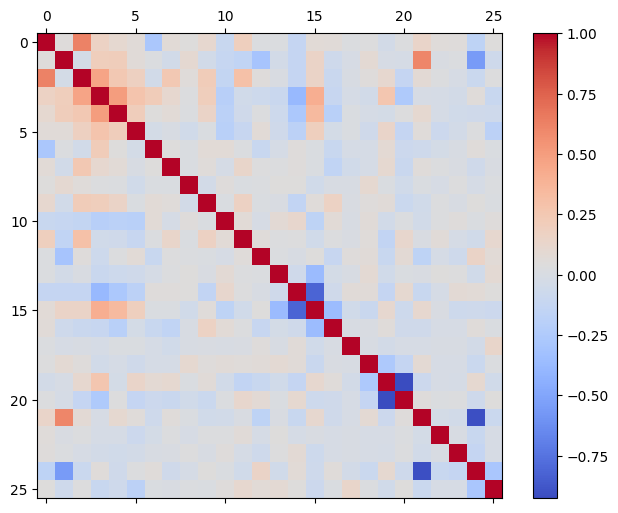

In [18]:
df = pd.DataFrame(X_cleaned)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Model Training

#Logistic Regression

In [ ]:
'''
Perform logistic regression instead of linear regression because our numerical values in y is meaningless.
(0, 1, 2, 3, 4, 5, 6 represents overweight level, not true predictable numerical value)
'''

In [ ]:
X = X_norm
Y = y
# Y = y_orig
# y_orig['NObeyesdad'].unique()
Y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


In [ ]:
# encoding for all categories in y
# use original y (y_orig), transform it and save as y for convinience
# found useless in this model, but save as future use

# one_hot_encode_cols = ['NObeyesdad']

# Y = pd.get_dummies(y_orig, columns=one_hot_encode_cols)
# Y = pd.DataFrame(Y)

# Y[Y.columns] = Y[Y.columns].astype(int)
# Y.head()

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.10, random_state=42)

# Cross Validation split
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

y_train.head()

,NObeyesdad
613,0
1461,4
1798,5
678,0
819,2


In [ ]:
# predict result
result = y_test.copy()
LgR = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
LgR.fit(X_train, y_train)
result["predict"] = LgR.predict(X_test)
result

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,NObeyesdad,predict
544,0,0
1987,6,6
420,0,2
527,0,0
196,1,3
...,...,...
893,2,3
188,4,2
1814,6,6
869,2,2


In [ ]:
print("Test Accuracy: ", LgR.score(X_test, y_test))
print("Train Accuracy: ", LgR.score(X_train, y_train))

Test Accuracy:  0.7169811320754716
Train Accuracy:  0.7588204318062138


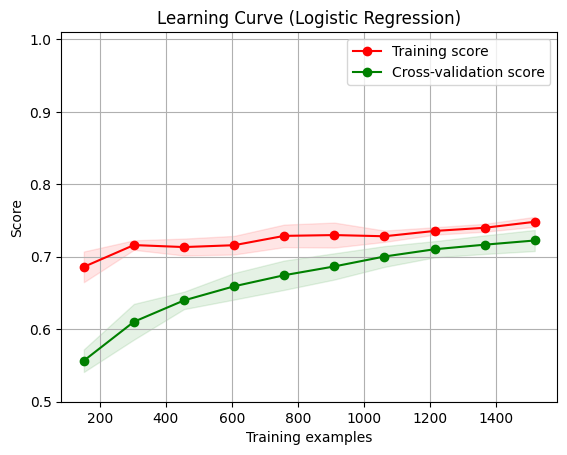

In [ ]:

# Create logistic regression model
model = LogisticRegression(max_iter=1000)

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title('Learning Curve (Logistic Regression)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.ylim(0.5, 1.01)
plt.grid()

# Plot the mean and standard deviation for training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')

# Plot the mean and standard deviation for validation scores
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


# Decision Tree

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy, report)

0.9361702127659575               precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.89      0.89      0.89        62
           2       0.91      0.89      0.90        56
           3       0.94      0.92      0.93        50
           4       0.95      0.94      0.94        78
           5       0.95      0.95      0.95        58
           6       1.00      1.00      1.00        63

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[54  2  0  0  0  0  0]
 [ 5 55  2  0  0  0  0]
 [ 0  5 50  1  0  0  0]
 [ 0  0  3 46  1  0  0]
 [ 0  0  0  2 73  3  0]
 [ 0  0  0  0  3 55  0]
 [ 0  0  0  0  0  0 63]]


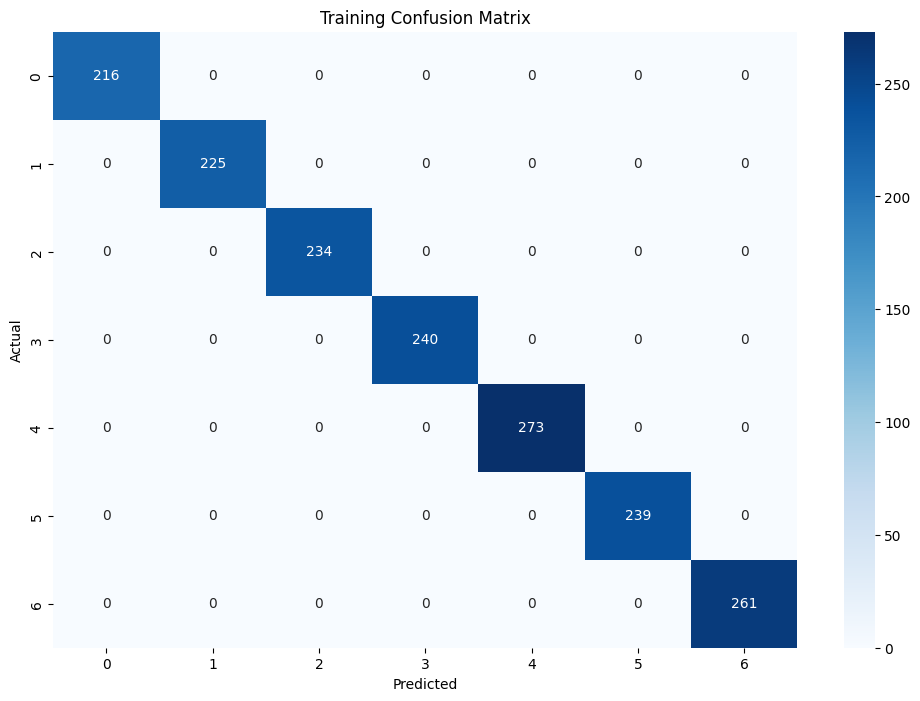

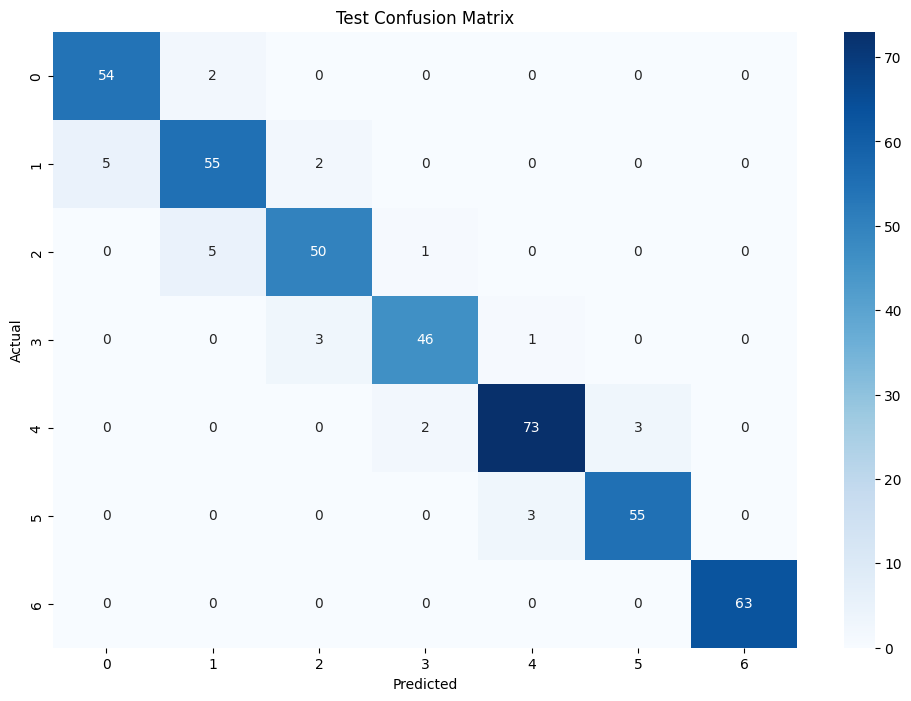

Training Accuracy: 1.0
Test Accuracy: 0.9361702127659575


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(12, 8))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

# Plot the confusion matrix for the test set
plt.figure(figsize=(12, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()

# Print the accuracy scores
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

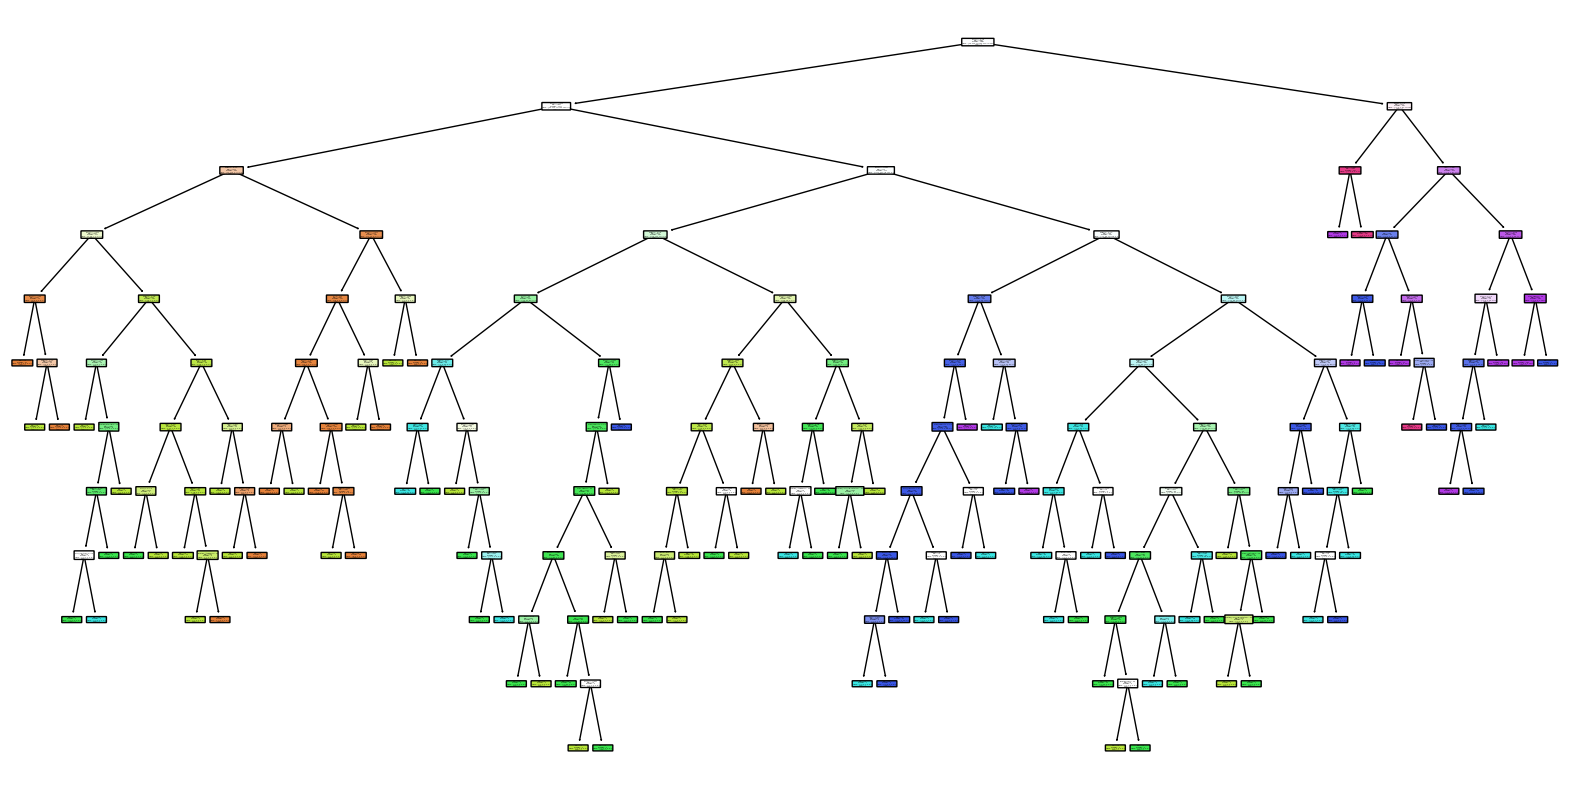

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert class names to strings to avoid the TypeError
class_names = [str(name) for name in clf.classes_]

# Visualize the decision tree again with the corrected class names
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_standardized.columns, class_names=class_names, rounded=True)
plt.show()

## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


({'criterion': 'entropy',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.9490527276877424)